In [1]:
import numpy as np

In [2]:
import pandas as pd
import os

In [3]:
import matplotlib.pyplot as plt

In [4]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [6]:
os.getcwd()

'C:\\Users\\jfzc\\PycharmProjects\\myQuantSampling'

In [5]:
data = pd.read_csv('Data\\600519.csv')

In [6]:
data.head()

,barTime,tickTime,tickUTC,bid1,bid2,bid3,bid4,bid5,ask1,ask2,...,cumVolume,imbl,imbl1,imbl2,imblAsk,imblBid,cancelBid,cancelAsk,volume,vwap
0,2016-03-01T09:31:00+08:00,2016-03-01T09:30:57+08:00,1.456796e+09,210.99,210.88,210.53,210.50,210.22,211.30,212.99,...,53600.0,-406600.0,-14100.0,-5900.0,500.0,3900.0,0.0,25300.0,53600.0,214.925205
1,2016-03-01T09:32:00+08:00,2016-03-01T09:31:57+08:00,1.456796e+09,212.02,212.01,212.00,211.50,211.31,212.97,212.98,...,68400.0,-21650.0,4400.0,-1600.0,600.0,1600.0,3800.0,0.0,14800.0,212.232500
2,2016-03-01T09:33:00+08:00,2016-03-01T09:32:48+08:00,1.456796e+09,212.50,212.05,212.01,212.00,211.55,212.77,212.90,...,84000.0,-965200.0,-9200.0,-10600.0,400.0,11200.0,1100.0,0.0,15600.0,212.063077
3,2016-03-01T09:34:00+08:00,2016-03-01T09:33:57+08:00,1.456796e+09,212.88,212.00,211.60,211.53,211.52,212.95,212.96,...,108900.0,1191300.0,20300.0,19100.0,10900.0,400.0,200.0,3400.0,24900.0,212.524177
4,2016-03-01T09:35:00+08:00,2016-03-01T09:34:57+08:00,1.456796e+09,212.00,211.33,211.31,211.30,211.19,212.82,212.90,...,133200.0,-1436350.0,-9700.0,-6500.0,1400.0,13100.0,0.0,10400.0,24300.0,211.665926


In [75]:
data['tickUTC'].diff().head()

0     NaN
1    60.0
2    51.0
3    69.0
4    60.0
Name: tickUTC, dtype: float64

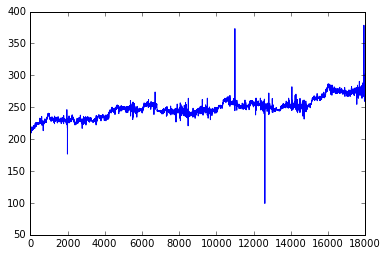

In [6]:
data.vwap.plot()

In [7]:
mydata=pd.DataFrame({'barTime':pd.to_datetime(data.barTime),
                    'tickTime':pd.to_datetime(data.tickTime),
                    'mid':(data.bid1+data.ask1)/2,
                    'vwap':data.vwap,
                    'imbl':data.imbl,
                    'imbl1':data.imbl1,
                    'imbl2':data.imbl2,
                     'imblDepth':data.imblAsk-data.imblBid,
                     'imblSpread':data.imbl2 - (data.imblAsk-data.imblBid),
                     'cancelImbl':data.cancelAsk-data.cancelBid,
                    'volume':data.volume})

In [8]:
def getFlattener(minutes):
    if minutes<(60+35):
        return 0
    else:
        if minutes<(60+45):
            return (minutes - (60+35))*0.1
        else:
            if minutes<(6*60 + 45):
                return 1
            else:
                if minutes<(6*60 + 55):
                    return 1 - (minutes - (6*60+45))*0.1
                else: return 0

In [9]:
mydata['flattener']=(60*mydata['barTime'].dt.hour+mydata['barTime'].dt.minute).apply(getFlattener)
mydata['date']=mydata.barTime.dt.date

In [10]:
dataStep = minuteDelta = 5
changeColume = 'mid'

In [11]:
mydata['future_change_'+str(dataStep)]=mydata[changeColume].diff(dataStep).shift(-dataStep)
mydata['timeStepCheck']=mydata.barTime.diff(dataStep).shift(-dataStep)
mydata.ix[mydata['timeStepCheck']!=pd.Timedelta(minutes = minuteDelta),'future_change_'+str(dataStep)]=NaN
mydata['future_nextChange_'+str(dataStep)]=mydata['future_change_'+str(dataStep)].shift(-1)

In [12]:
dataStep = minuteDelta = 1
mydata['future_change_'+str(dataStep)]=mydata[changeColume].diff(dataStep).shift(-dataStep)
mydata['timeStepCheck']=mydata.barTime.diff(dataStep).shift(-dataStep)
mydata.ix[mydata['timeStepCheck']!=pd.Timedelta(minutes = minuteDelta),'future_change_'+str(dataStep)]=NaN
mydata['future_nextChange_'+str(dataStep)]=mydata['future_change_'+str(dataStep)].shift(-1)

mydata['future_change_1'].mean()/mydata['future_change_1'].std()*sqrt(240*250)

3.450853339354961

In [53]:
mydata[['imbl','imbl1','imbl2','imblSpread','imblDepth','cancelImbl','future_change_1']].corr()

,imbl,imbl1,imbl2,imblSpread,imblDepth,cancelImbl,future_change_1
imbl,1.000000,0.354656,0.348115,0.057102,0.407158,0.000581,0.004285
imbl1,0.354656,1.000000,0.954370,0.541230,0.827605,0.084221,0.078577
imbl2,0.348115,0.954370,1.000000,0.636136,0.815380,0.114396,0.074054
imblSpread,0.057102,0.541230,0.636136,1.000000,0.072008,0.282348,0.066976
imblDepth,0.407158,0.827605,0.815380,0.072008,1.000000,-0.063972,0.045242
cancelImbl,0.000581,0.084221,0.114396,0.282348,-0.063972,1.000000,0.000443
future_change_1,0.004285,0.078577,0.074054,0.066976,0.045242,0.000443,1.000000


In [13]:
rawFeature = ['imbl','imbl1','imbl2','imblDepth','imblSpread','cancelImbl']
ewmaWindow=15
quan=0.5
for col in rawFeature:
    mydata['feature_'+col] = np.power(mydata[col].ewm(com = ewmaWindow).mean(),1)
#    mydata['feature_'+col]=tanh(mydata['feature_'+col]/np.abs(mydata['feature_'+col]).quantile(quan))

In [86]:
rawFeature = ['vwap','mid']
ewmaWindow = 5
scale = 2
quan=0.5
for col in rawFeature:
    mydata['feature_'+col] = mydata[col].ewm(com=ewmaWindow).mean()-mydata[col].ewm(com=ewmaWindow*scale).mean()
    mydata['feature_2'+col]= mydata['feature_'+col].ewm(com=ewmaWindow*2).mean()-mydata['feature_'+col].ewm(com=ewmaWindow*scale*2).mean()
    mydata['feature_'+col]= tanh(mydata['feature_'+col]/np.abs(mydata['feature_'+col]).quantile(quan))
    mydata['feature_2'+col]= tanh(mydata['feature_2'+col]/np.abs(mydata['feature_2'+col]).quantile(quan))

In [66]:
featureCol=[feat for feat in mydata.columns if ('feature' in feat)]
mydata[featureCol+['future_change_5','future_nextChange_5']].corr()

,feature_imbl,feature_imbl1,feature_imbl2,feature_imblDepth,feature_imblSpread,feature_cancelImbl,feature_vwap,feature_2vwap,feature_mid,feature_2mid,feature_composite,future_change_5,future_nextChange_5
feature_imbl,1.000000,0.382485,0.361905,0.430422,0.113673,-0.048808,0.388393,0.192006,0.298031,0.144416,0.312075,0.011015,0.005802
feature_imbl1,0.382485,1.000000,0.947411,0.712362,0.561883,0.138265,0.485521,0.260444,0.536225,0.276604,0.682351,0.029427,0.018032
feature_imbl2,0.361905,0.947411,1.000000,0.643304,0.669934,0.243618,0.440510,0.247542,0.488131,0.265453,0.676360,0.026624,0.017753
feature_imblDepth,0.430422,0.712362,0.643304,1.000000,0.057987,-0.201374,0.446008,0.206979,0.492324,0.217192,0.498681,0.005579,0.002935
feature_imblSpread,0.113673,0.561883,0.669934,0.057987,1.000000,0.562187,0.189054,0.137541,0.208095,0.150488,0.463520,0.026376,0.016917
feature_cancelImbl,-0.048808,0.138265,0.243618,-0.201374,0.562187,1.000000,-0.067543,0.014496,-0.074897,0.028062,0.097326,0.018368,0.018065
feature_vwap,0.388393,0.485521,0.440510,0.446008,0.189054,-0.067543,1.000000,0.690447,0.854565,0.626943,0.818583,0.057621,0.053036
feature_2vwap,0.192006,0.260444,0.247542,0.206979,0.137541,0.014496,0.690447,1.000000,0.650147,0.904683,0.656423,0.051293,0.046029
feature_mid,0.298031,0.536225,0.488131,0.492324,0.208095,-0.074897,0.854565,0.650147,1.000000,0.715151,0.948267,0.056393,0.053539
feature_2mid,0.144416,0.276604,0.265453,0.217192,0.150488,0.028062,0.626943,0.904683,0.715151,1.000000,0.722702,0.055618,0.050506


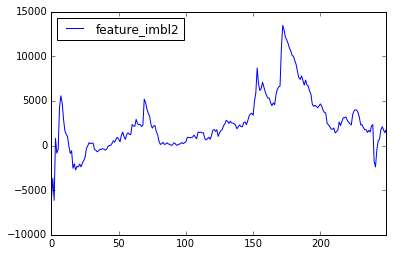

In [16]:
mydata[['feature_imbl2']].head(250).plot()

In [87]:
mydata['feature_composite']=(mydata['feature_imbl2']+mydata['feature_imblSpread']+4*mydata['feature_mid']+mydata['feature_2mid'])/7

In [89]:
changeCol='future_change_1'
changeCol='future_nextChange_1'
featureCol=['imbl1','imbl2','imblDepth','imblSpread','cancelImbl','vwap','mid']
featureCol=['imbl1','imbl2','imblDepth','imblSpread','cancelImbl','vwap','mid','2mid','composite']

for col in featureCol:
#    mydata.ix[mydata['feature_'+col]<0,'feature_'+col]=0
    mydata['pnl_'+col]=mydata['feature_'+col]*mydata[changeCol]*mydata['flattener']

In [90]:
tick=0.01
costmultiplier = 2
for col in featureCol:
    cost=np.abs((mydata['feature_'+col]*mydata['flattener']).diff())*tick*costmultiplier
    mydata['netpnl_'+col]=mydata['pnl_'+col]-cost
    dailypnl= mydata.groupby('date')['netpnl_'+col].sum()
    print(col)
    #daycount, rawpnl mean, rawpnl std, netpnl mean, netpnl std, win days ratio
    print(np.round([mydata['pnl_'+col].dropna().count()/(4*60),
                    mydata['pnl_'+col].mean()*240,mydata['pnl_'+col].std()*sqrt(240),
                    mydata['netpnl_'+col].mean()*240,mydata['netpnl_'+col].std()*sqrt(240),
                    len(dailypnl[dailypnl>0])/len(dailypnl)],4))

imbl1
[ 73.95     0.7142   2.7016   0.285    2.7034   0.44  ]
imbl2
[ 73.95     0.7343   2.6854   0.2954   2.6862   0.4533]
imblDepth
[  7.39500000e+01   3.38600000e-01   2.77580000e+00  -6.89000000e-02
   2.77650000e+00   4.66700000e-01]
imblSpread
[ 73.95     0.5774   2.691    0.1832   2.6915   0.5067]
cancelImbl
[  7.39500000e+01   3.45400000e-01   2.66780000e+00   5.49000000e-02
   2.66790000e+00   4.93300000e-01]
vwap
[ 73.95     1.1242   2.7536   0.4113   2.7561   0.4533]
mid
[ 73.95     1.2291   2.8095   0.9314   2.8102   0.56  ]
2mid
[ 73.95     1.136    2.7547   0.915    2.755    0.5867]
composite
[ 73.95     1.052    2.2531   0.789    2.2536   0.52  ]


netpnl_imbl1         1.663302
netpnl_imbl2         1.734906
netpnl_imblDepth    -0.391347
netpnl_imblSpread    1.073747
netpnl_cancelImbl    0.324805
netpnl_vwap          2.354627
netpnl_mid           5.229686
netpnl_2mid          5.240470
netpnl_composite     5.524278
dtype: float64


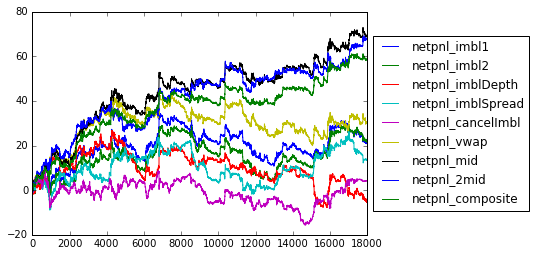

In [91]:
pnlCol=['netpnl_'+col for col in featureCol]
print(mydata[pnlCol].mean()/mydata[pnlCol].std()*sqrt(239*250))
mydata[pnlCol].cumsum().plot()
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

pnl_imbl1         4.171286
pnl_imbl2         4.314207
pnl_imblDepth     1.924856
pnl_imblSpread    3.385661
pnl_cancelImbl    2.043042
pnl_vwap          6.441542
pnl_mid           6.902530
pnl_2mid          6.506713
pnl_composite     7.366976
dtype: float64


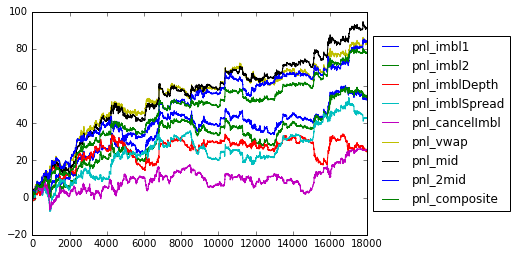

In [92]:
pnlCol=['pnl_'+col for col in featureCol]
print(mydata[pnlCol].mean()/mydata[pnlCol].std()*sqrt(239*250))
mydata[pnlCol].cumsum().plot()
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

In [72]:
temp = mydata.set_index('barTime')['2016-03-14']

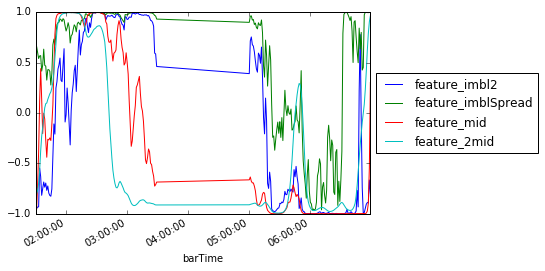

In [73]:
temp[['feature_imbl2','feature_imblSpread','feature_mid','feature_2mid']].plot()
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

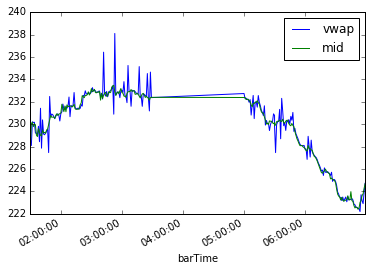

In [39]:
temp[['vwap','mid']].plot()

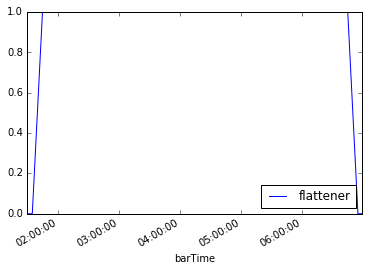

In [592]:
temp[['flattener']].plot()

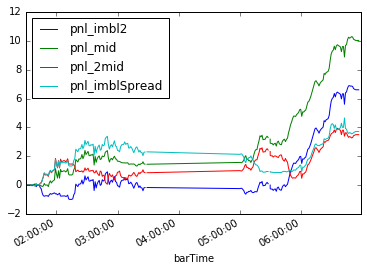

In [63]:
temp[['pnl_imbl2','pnl_mid','pnl_2mid','pnl_imblSpread']].cumsum().plot()

In [42]:
groupedpnl = mydata.set_index('barTime')[pnlCol].groupby(pd.TimeGrouper(freq='30Min')).mean()

In [43]:
groupedpnl['time']=groupedpnl.index.time

In [44]:
groupedpnl.dropna().groupby('time').mean()

,pnl_imbl1,pnl_imbl2,pnl_imblDepth,pnl_imblSpread,pnl_cancelImbl,pnl_vwap,pnl_mid,pnl_2mid,pnl_composite
time,,,,,,,,,
01:30:00,-0.002242,-0.003221,-0.002218,-0.004008,-0.003374,0.006069,0.005451,0.002995,0.002510
02:00:00,0.009532,0.011445,0.003227,0.013017,-0.004642,0.012856,0.014333,0.011526,0.013331
02:30:00,0.004913,0.002606,0.004108,-0.000687,0.000022,0.007793,0.007935,0.007996,0.005950
03:00:00,0.003281,0.003816,-0.000629,0.002178,-0.001261,0.006858,0.007926,0.003250,0.005850
03:30:00,-0.207726,-0.201180,-0.217609,-0.116137,-0.119779,-0.212451,-0.225539,-0.207726,-0.203885
05:00:00,-0.000742,-0.000842,0.000306,0.000575,0.004130,-0.001183,-0.001663,0.001674,-0.000749
05:30:00,0.002336,0.002996,0.004738,0.002894,-0.005011,0.002180,0.003612,0.001576,0.003130
06:00:00,0.008394,0.010393,0.003441,0.007908,-0.000061,0.003050,0.003273,0.000499,0.004556
06:30:00,-0.001760,-0.002887,-0.001266,-0.003203,-0.000489,-0.000586,-0.000044,-0.000865,-0.001019
